# Appendix

In [1]:
%config Completer.use_jedi = False  # enable code auto-completion
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #data visualization library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix  # evaluation metrics

## Dataset
### Reading the data

In [2]:
# Read in the data stored in the file 'ReadingHabbitData.csv'
df = pd.read_csv('ReadingHabbitData.csv', encoding='ANSI')
# Print the first 5 rows of the DataFrame 'df'
df.head(5)

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
0,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
1,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
2,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
3,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No
4,55,Female,Asian or Pacific Islander,Divorced,"Some college, no 4-year degree",Have own business/self-employed,"$40,000 to under $50,000",97,Yes,Yes,Yes,Purchased the book,No,No


### Preprocessing

In [3]:
# drop unrelevant columns
df.drop(columns=['Race','Last book you read, you…','Do you happen to read any daily news or newspapers?',\
                 'Do you happen to read any magazines or journals?'],inplace=True) 
# rename columns 
df.columns =['age','sex','marital','education','employment','incomes','booknum','ifprinted','ifaudio','ife'] 
df.head(5)

,age,sex,marital,education,employment,incomes,booknum,ifprinted,ifaudio,ife
0,46,Male,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes
1,32,Male,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes
2,27,Male,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes
3,16,Female,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No
4,55,Female,Divorced,"Some college, no 4-year degree",Have own business/self-employed,"$40,000 to under $50,000",97,Yes,Yes,Yes


In [4]:
# get the number of missing data points per column
missing_number = df.isnull().sum()
missing_percent = (df.isnull().sum()/df.isnull().count())
missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
missing_values

,Missing_Number,Missing_Percent
age,0,0.000000
sex,0,0.000000
marital,0,0.000000
education,0,0.000000
employment,0,0.000000
incomes,0,0.000000
booknum,0,0.000000
ifprinted,390,0.137761
ifaudio,390,0.137761
ife,390,0.137761


In [ ]:
# fill the missing blank
df.fillna('No', inplace=True)
df.tail()

# delete the rows containing invalid value
df=df[~(df['marital'].str.contains('know')|df['education'].str.contains('know|None')|df['incomes'].str.contains('Refused')\
        |df['ifprinted'].str.contains('know')|df['ifaudio'].str.contains('know')|df['ife'].str.contains('know'))]
df.tail()

# transform categories to numerical
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1}).astype(int)
df['marital'] = df['marital'].map( {'Single': 0, 'Separated': 0, 'Never been married': 0, 'Divorced': 0, 'Widowed': 0,'Living with a partner': 0, 'Married': 1} ).astype(int)
df['education'] = df['education'].map( {'High school incomplete': 0, 'High school graduate': 0, 'Some college, no 4-year degree': 1, 'Technical, trade or vocational school AFTER high school': 1, 'College graduate': 2, 'Post-graduate training/professional school after college': 2} ).astype(int)
df['employment'] = df['employment'].map( {'Employed full-time': 0, 'Student': 1, 'Have own business/self-employed': 2, 'Employed part-time': 3, 'Other': 4, 'Not employed for pay': 4, 'Disabled': 5, 'Retired': 6} ).astype(int)
df['incomes'] = df['incomes'].map( {'Less than $10,000': 0, '$10,000 to under $20,000': 0, '$20,000 to under $30,000': 0, \
                                    '$30,000 to under $40,000':1, '$40,000 to under $50,000': 1,\
                                    '$50,000 to under $75,000': 2, \
                                    '$75,000 to under $100,000': 3, '$100,000 to under $150,000': 3, '9$100,000 to under $150,000': 3} ).astype(int)
df['ifprinted'] = df['ifprinted'].map({'No': 0, 'Yes': 1}).astype(int)
df['ifaudio'] = df['ifaudio'].map({'No': 0, 'Yes': 1}).astype(int)
df['ife'] = df['ife'].map({'No': 0, 'Yes': 1}).astype(int)

In [6]:
# define the label, a new column
minvalue = df['booknum'].min() # minimum value of the column 'booknum'
maxvalue = df['booknum'].max() # maximum value of the column 'booknum'

if 'isreader' in df.columns:  # delete existing 'binarized max temperature' if there is
    df = df.drop(['isreader'],axis=1)
    
bi_labels = [0,1] # new labels to be assigned
bi_cut_bins = [minvalue,12,maxvalue] #cutting intervals/criteria [minvalue,12],(12,maxvalue]

# Encode max temperatures to binary labels
binarized_booknum = pd.cut(df['booknum'],bins=bi_cut_bins,labels=bi_labels,include_lowest=True)
# Insert a new column "isreader" to the datafame
# Int 10 is the position where the new column will be inserted to
df.insert(10,'isreader',binarized_booknum) 
df['isreader'] = np.where(df['isreader']&df['ifprinted']&df['ifaudio']&df['ife'], 1, 0)
df.head()

,age,sex,marital,education,employment,incomes,booknum,ifprinted,ifaudio,ife,isreader
0,46,0,1,0,0,0,97,1,1,1,1
1,32,0,0,0,0,0,97,0,1,1,0
2,27,0,1,0,0,1,97,1,0,1,0
3,16,1,0,0,3,0,97,1,1,0,0
4,55,1,0,1,2,1,97,1,1,1,1


### Data Visualization and Analysis 

0    2351
1     105
Name: isreader, dtype: int64


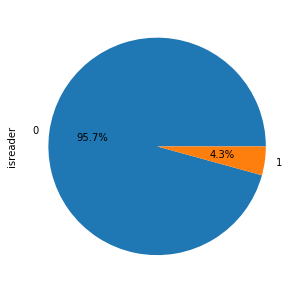

In [7]:
# plot the label
print(df['isreader'].value_counts())
df['isreader'].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(5,5));

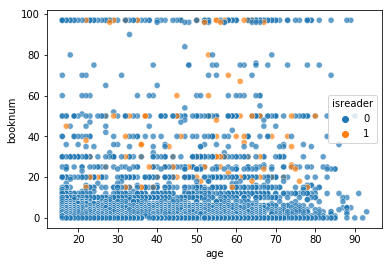

In [8]:
# plot the numerical feature
# scatter
sns.scatterplot(data=df, x='age', y='booknum', hue='isreader', alpha=0.7)

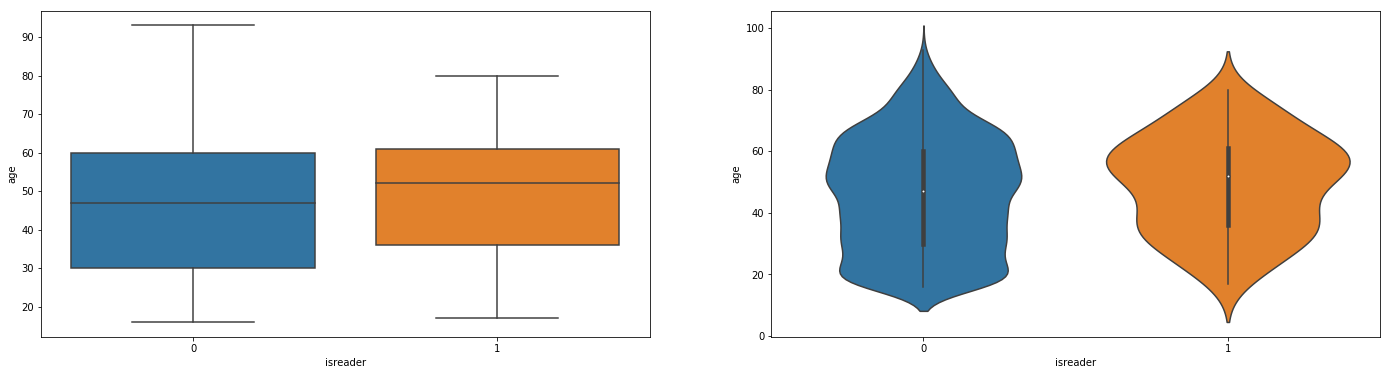

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6))
# boxplot
sns.boxplot(x='isreader', y='age', data=df, ax=ax[0])
# violinplot
sns.violinplot(x='isreader', y='age', data=df, ax=ax[1])
plt.show()

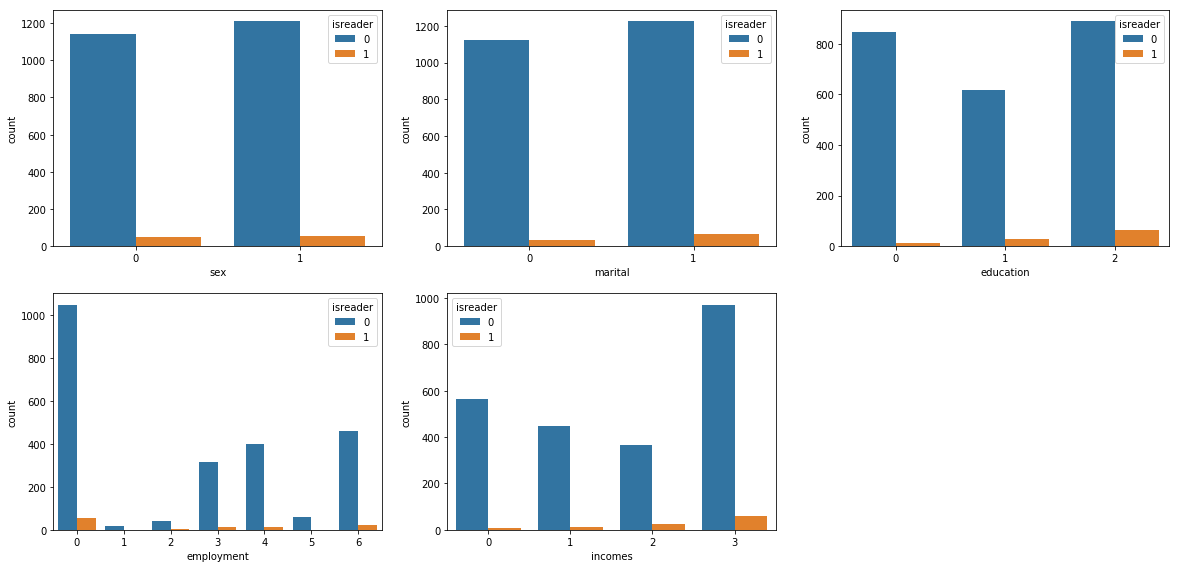

In [10]:
# plot the categorical feature
categorical = ['sex', 'marital', 'education', 'employment', 'incomes']
index = 0
plt.figure(figsize=(20,20))
for feature in categorical:
    if feature != "isreader":
        index += 1
        plt.subplot(4, 3, index)
        sns.countplot(data = df, x =feature, hue = "isreader")

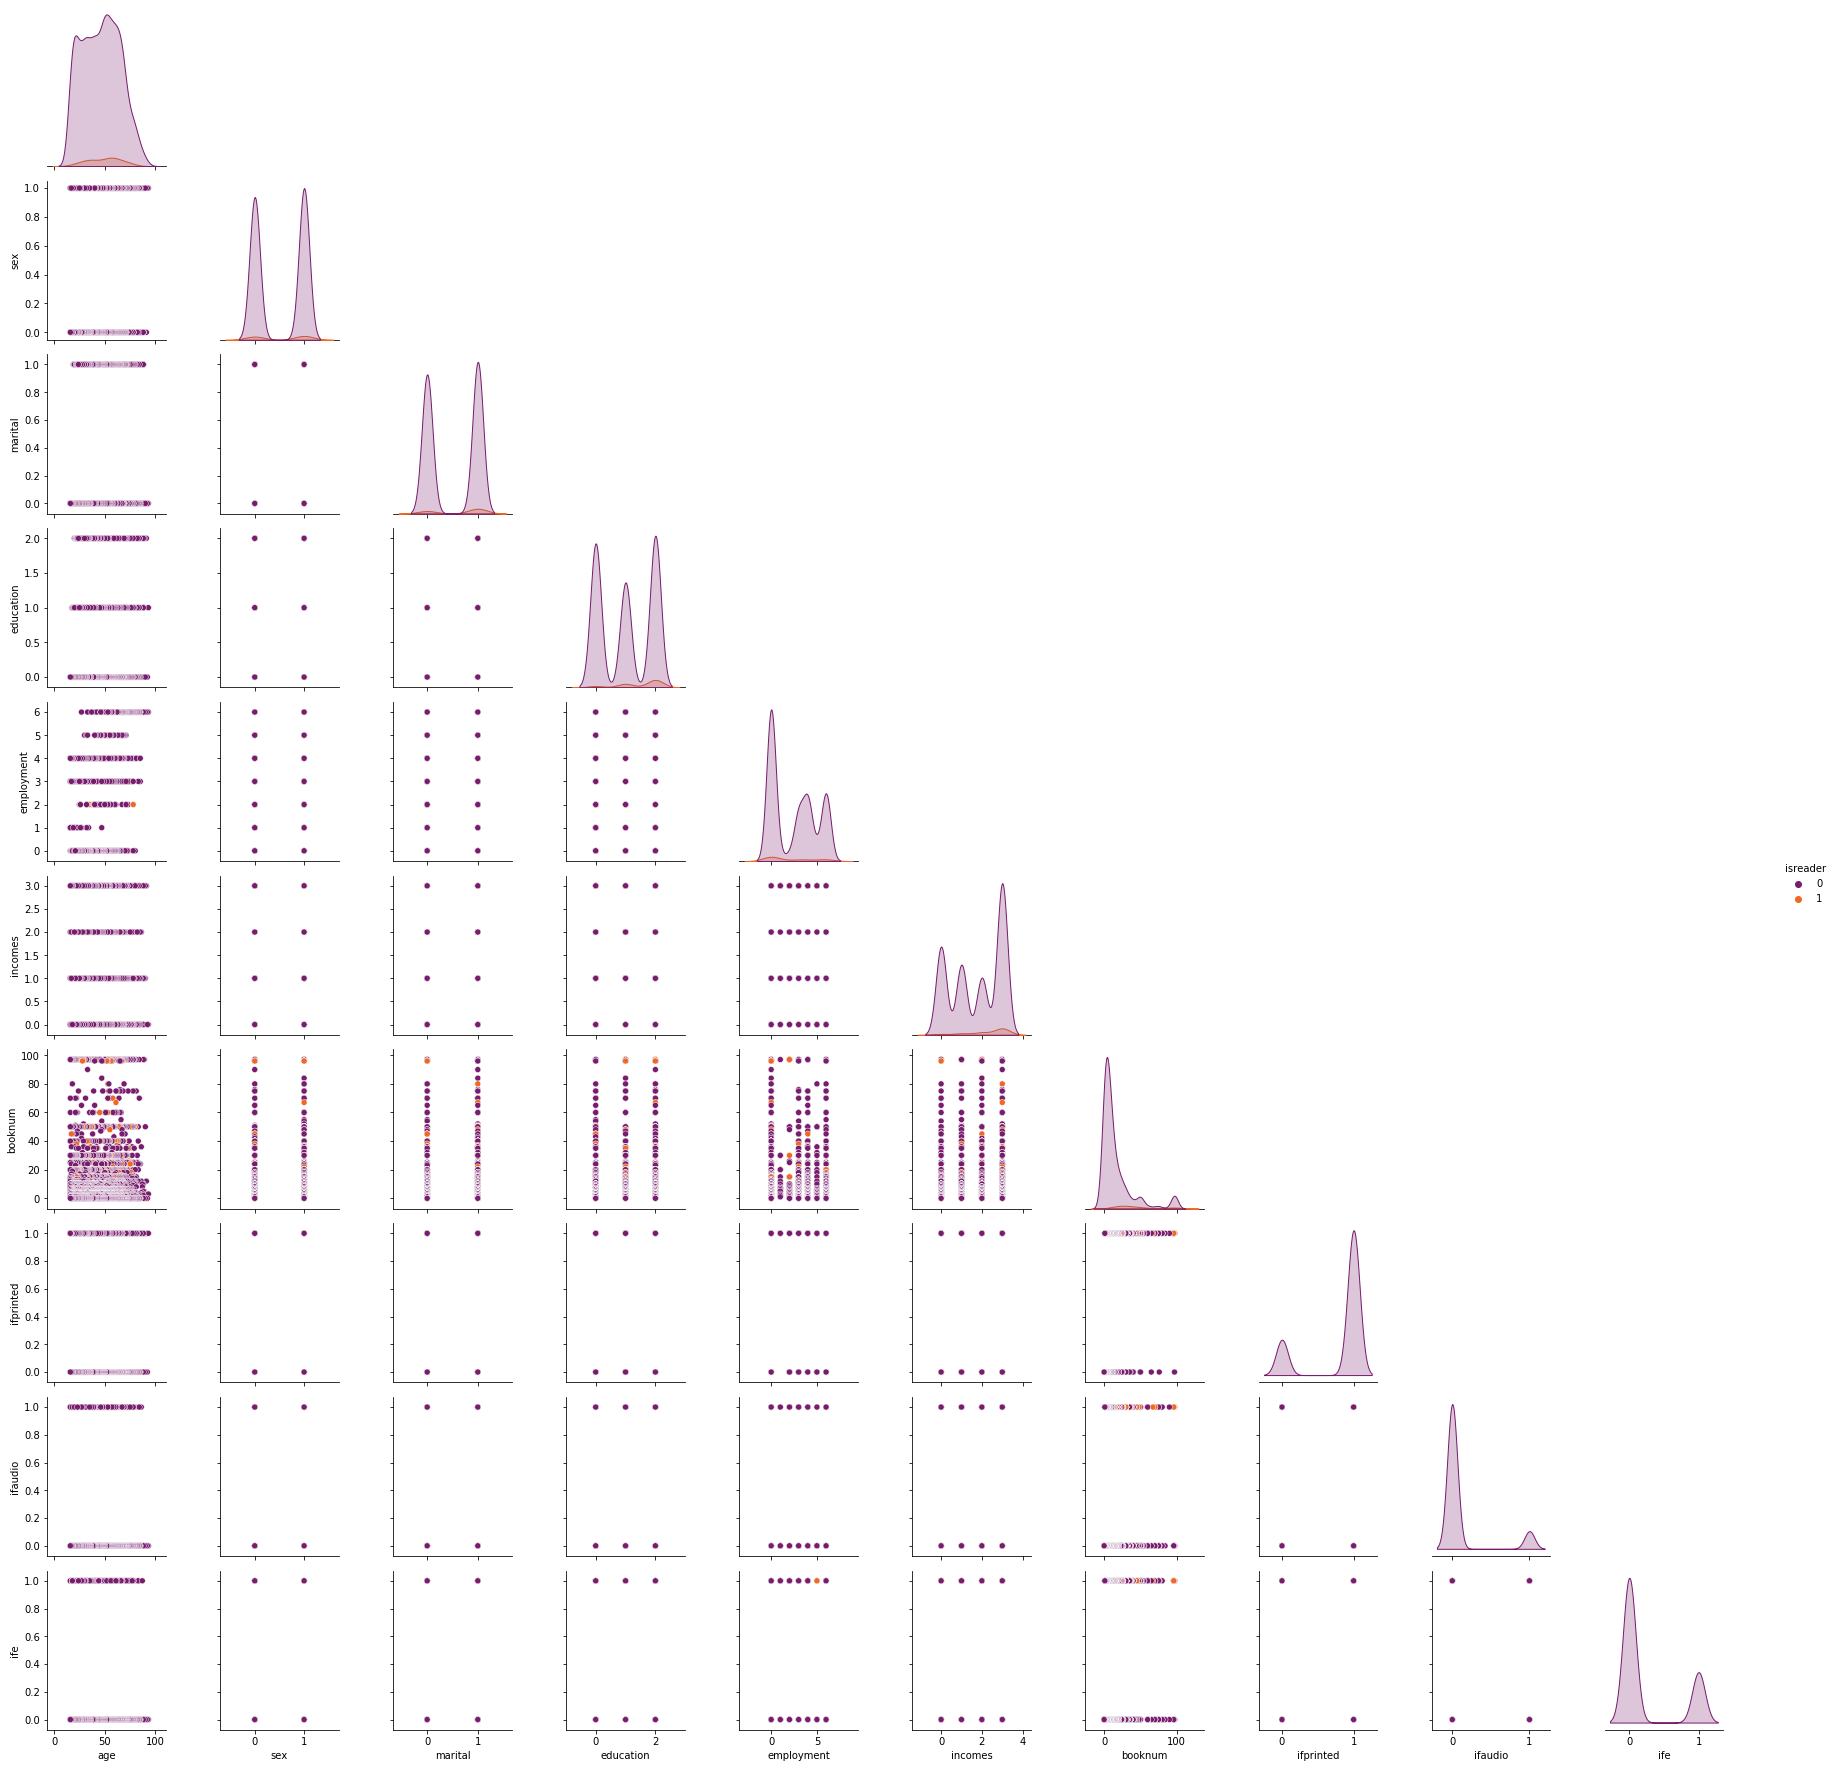

In [11]:
# pairplot
sns.pairplot(df, hue="isreader", palette="inferno", corner=True);

## Models

### Logistic regression

In [149]:
X = df[['age','sex','marital','education','employment','incomes']]
y = df['isreader']

temp_train_feas, X_test_i, temp_train_labs, y_test = train_test_split(X.index, y, test_size = 0.2)
X_train_i, X_val_i, y_train, y_val = train_test_split(temp_train_feas, temp_train_labs, test_size = 0.2)

X_train = X.loc[X_train_i]
X_val = X.loc[X_val_i]
X_test = X.loc[X_test_i]

# print(y_train)
# print(y_val)
# print(y_test)


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.metrics import log_loss

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)
acc_lr = accuracy_score(y_val, y_pred)

y_pred_prob = clf.predict_proba(X_val)
val_loss_lr = log_loss(y_val, y_pred_prob)

y_pred_prob = clf.predict_proba(X_train)
train_loss_lr = log_loss(y_train, y_pred_prob)

print("Accuracy score: ", acc_lr)
print("Validation loss:  ", val_loss_lr)
print("Training loss:     ", train_loss_lr)

Accuracy score:  0.9491094147582697
Validation loss:   0.19492309121923687
Training loss:      0.16074411712243253


### Decision tree

In [109]:
X = df[['age','sex','marital','education','employment','incomes']]
y = df['isreader']

temp_train_feas, X_test_i, temp_train_labs, y_test = train_test_split(X.index, y, test_size = 0.2)
X_train_i, X_val_i, y_train, y_val = train_test_split(temp_train_feas, temp_train_labs, test_size = 0.2)

X_train = X.loc[X_train_i]
X_val = X.loc[X_val_i]
X_test = X.loc[X_test_i]

from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import log_loss

bestloss = 500
bestdepth = 0
bestacc = 500
bestf1 = 500

for i in range(1,20):
#     print("Tree depth = ", i)
    clf_tree = tree.DecisionTreeClassifier(max_depth = i)
    clf_tree.fit(X_train, y_train)
    
    y_pred_tree = clf_tree.predict(X_val)
    acc_tree = accuracy_score(y_val, y_pred_tree)
    
    y_pred_prob_t = clf_tree.predict_proba(X_val)
    val_loss_tree = log_loss(y_val, y_pred_prob_t)
    
    y_pred_prob_t = clf_tree.predict_proba(X_train)
    train_loss_tree = log_loss(y_train, y_pred_prob_t)
    
#     print("The accuracy: ", acc_tree)
#     print("The validation loss: ", val_loss_tree)
#     print("The training loss: ", train_loss_tree)
    
    if val_loss_tree < bestloss:
        bestdepth = i
        bestloss = val_loss_tree
        besttrainloss = train_loss_tree
        bestacc = acc_tree
        clf = clf_tree

print("Best depth: ", bestdepth)
print("Accuracy score: ", bestacc)
print("Validation error: ", bestloss)
print("Training error:    ", besttrainloss)

Best depth:  3
Accuracy score:  0.9643765903307888
Validation error:  0.14390378486877387
Training error:     0.15763455549716152


### Test

In [144]:
# test the decision tree model
y_test_pred = clf.predict(X_test)
print("The test accuracy: ", accuracy_score(y_test, y_test_pred))

y_test_pred_prob = clf.predict_proba(X_test)
test_loss_tree = log_loss(y_test, y_test_pred_prob)
print("The testing loss:   ", test_loss_tree)


The test accuracy:  0.9634146341463414
The testing loss:    0.14232168210348847
